In [52]:
import sys
sys.path.append('..')
from src.analysis.model_performances import *
from src.questions_construction.questions import *
import pandas as pd
EVERYTHING_POSTFIX = 'everything'
from helpers import *

In [53]:
questions_dir = f'{DATA_PATH}/questions_m1'
questions_by_id = gather_questions(questions_dir)
# sanity_checks()
data_all, missing_data = gather_data(questions_by_id)

data is gathered


In [106]:
model_name = 'gemini'#'gemma-2b-it'
prompt_type = 'few_shot_1'
question_category = ALL_QUESTION_CATEGORIES_KEY
# substitutions = WITHOUT_RANDOM_SUB
ramifications = WITH_RAMIFICATIONS
answer_type = TRUE_FALSE_ANSWER_TYPE

plan_length = 1
domain = ALL_DOMAINS_KEY

categories = list(FLUENT_TYPES_LIST)
save_dir = os.path.join(STATISTICS_PATH, 'plots', 'by_fluents')
os.makedirs(save_dir, exist_ok=True)

# By ramifications

by ramifications, gemini, few shot 1, ALL DOMAINS, with random sub, pl-1


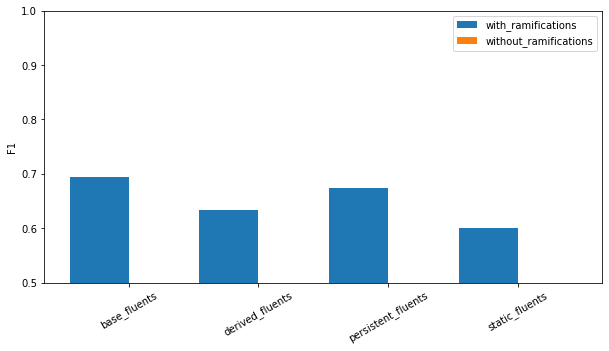

In [107]:
substitutions = WITH_RANDOM_SUB

data_for_plot = []
for ramifications in RAMIFICATION_TYPES:
    data_for_plot_instance = {NAME_KEY: ramifications, DATA_KEY: []}
    for fluent_type in categories:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_FLUENT_TYPE, {fluent_type})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions)
        data_for_plot_instance[DATA_KEY].append(stats.compute()['result'])
    data_for_plot.append(data_for_plot_instance)
    

plt_n_bars(categories, data_for_plot)
plt.ylabel('F1')
plt.ylim([0.5,1])

save_name =  f'by_ramifications.{model_name}.{prompt_type}.{domain}.{substitutions}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))

# By question Categories

by question category, gemini, few shot 1, ALL DOMAINS, with ramifications, without random sub, pl-1


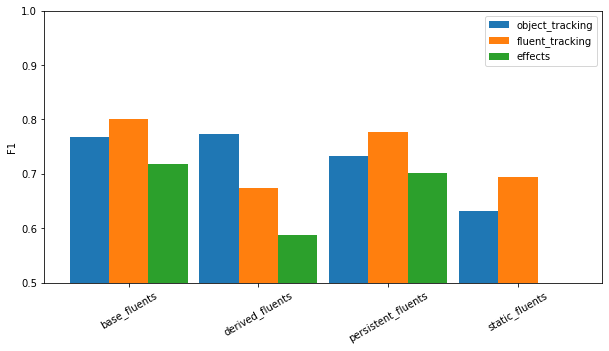

In [108]:
substitutions = WITHOUT_RANDOM_SUB
ramifications = WITH_RAMIFICATIONS

data_for_plot = []
for question_category in QUESTION_CATEGORIES:
    data_for_plot_instance = {NAME_KEY: question_category, DATA_KEY: []}
    for fluent_type in categories:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_FLUENT_TYPE, {fluent_type}), (OUT_OBJ_QUESTION_CATEGORY, {question_category})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions)
        data_for_plot_instance[DATA_KEY].append(stats.compute()['result'])
    if data_for_plot_instance[DATA_KEY][0]:
        data_for_plot.append(data_for_plot_instance)

    
plt_n_bars(categories, data_for_plot)
plt.ylabel('F1')
plt.ylim([0.5,1])

save_name =  f'by_question_category.{model_name}.{prompt_type}.{domain}.{ramifications}.{substitutions}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))

# By Random Subs

by subs, gemini, few shot 5, ALL DOMAINS, pl-1


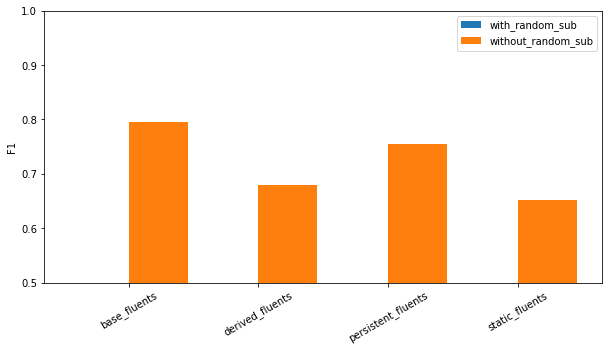

In [101]:
data_for_plot = []
for substitutions in SUBSTITUTION_TYPES:
    data_for_plot_instance = {NAME_KEY: substitutions, DATA_KEY: []}
    for fluent_type in categories:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_FLUENT_TYPE, {fluent_type})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions)
        data_for_plot_instance[DATA_KEY].append(stats.compute()['result'])
    data_for_plot.append(data_for_plot_instance)
    

plt_n_bars(categories, data_for_plot)
plt.ylabel('F1')
plt.ylim([0.5,1])

save_name =  f'by_subs.{model_name}.{prompt_type}.{domain}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))

# By Domain Category

by domains, gemini, few shot 1, NON TRANSPORTATION, without random sub, pl-1


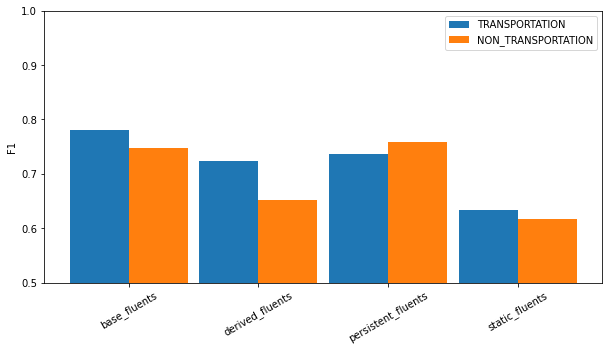

In [74]:
substitutions = WITHOUT_RANDOM_SUB

data_for_plot = []
for domain, domain_names in [(TRANSPORTATION_DOMAIN_KEY, TRANSPORTATION_DOMAINS), (NON_TRANSPORTATION_DOMAIN_KEY, NON_TRANSPORTATION_DOMAINS)]:
    data_for_plot_instance = {NAME_KEY: domain, DATA_KEY: []}
    for fluent_type in categories:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_DOMAIN_NAME, set(domain_names)), (OUT_OBJ_FLUENT_TYPE, {fluent_type})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions)
        data_for_plot_instance[DATA_KEY].append(stats.compute()['result'])
    data_for_plot.append(data_for_plot_instance)
    

plt_n_bars(categories, data_for_plot)
plt.ylabel('F1')
plt.ylim([0.5,1])

save_name =  f'by_domains.{model_name}.{prompt_type}.{domain}.{substitutions}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))

# By positive and neg fluents

by pos neg, gemini, few shot 1, ALL DOMAINS, without random sub, without ramifications, pl-1


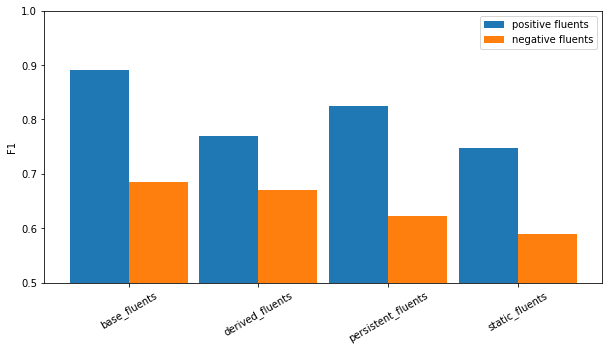

In [75]:
# by_is_pos_fluent_question = {}
# for is_pos_fluent_question in [True, False, None]:
#     data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_IS_POS_FLUENT_QUESTION, {is_pos_fluent_question})])
#     stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions)
#     by_is_pos_fluent_question[is_pos_fluent_question] = stats.compute()['result']

substitutions = WITHOUT_RANDOM_SUB
domain = ALL_DOMAINS_KEY
ramifications = WITHOUT_RAMIFICATIONS

to_pretty = {True: 'positive fluents', False: 'negative fluents'}
data_for_plot = []
for is_pos_fluent_question in [True, False]:
    data_for_plot_instance = {NAME_KEY: to_pretty[is_pos_fluent_question], DATA_KEY: []}
    for fluent_type in categories:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_IS_POS_FLUENT_QUESTION, {is_pos_fluent_question}), (OUT_OBJ_FLUENT_TYPE, {fluent_type})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions)
        data_for_plot_instance[DATA_KEY].append(stats.compute()['result'])
    data_for_plot.append(data_for_plot_instance)
    

plt_n_bars(categories, data_for_plot)
plt.ylabel('F1')
plt.ylim([0.5,1])

save_name =  f'by_pos_neg.{model_name}.{prompt_type}.{domain}.{substitutions}.{ramifications}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))